In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy, pandas, os, matplotlib.pyplot as rvmp, seaborn as rvse, datetime, random
from sklearn import metrics, decomposition, model_selection, utils, pipeline,preprocessing, feature_selection, tree
from plotly import express
import plotly.graph_objects as go
import pickle
from IPython.display import display, HTML
from sklearn import tree,linear_model,svm,neighbors,neural_network,ensemble

## Data Reading

In [2]:
SIIData=pandas.read_csv("Startups_India_Investments.csv")
if "Unnamed: 0" in SIIData.columns:
    SIIData=SIIData.drop("Unnamed: 0",axis=1)
SIIData.head()

,Startup_ID,Name,Sector,Sub-Sector,City,State,Founded_Year,Founder_Name,Funding_Stage,Investment_Type,...,Exit_Status,Acquisition_Details,Funding_Date,Pitch_Deck_Link,Social_Media_Followers,Competitors,Patents,ESG_Score,Diversity_Index,Net_Impact_Score
0,a713cd4f,Startup_0,Retail,Sub_2,Pune,Maharashtra,2022,Founder_356,Series D,Grant,...,No,NaN,2023-07-08,http://example.com/pitchdeck/0,27648,Competitor_88,11,5.32,39.33,4.71
1,b75f6987,Startup_1,EdTech,Sub_2,Pune,Karnataka,2019,Founder_93,IPO,Convertible Note,...,Yes,Acquirer_185,2017-01-02,http://example.com/pitchdeck/1,89143,Competitor_66,17,2.50,43.19,5.03
2,d5ba7ec2,Startup_2,AgriTech,Sub_7,Chennai,Tamil Nadu,2010,Founder_951,Series A,Grant,...,Yes,NaN,2022-06-20,http://example.com/pitchdeck/2,62445,Competitor_93,4,5.13,36.11,5.71
3,5190a643,Startup_3,HealthTech,Sub_8,Mumbai,Telangana,2007,Founder_538,IPO,Debt,...,Yes,NaN,2021-01-11,http://example.com/pitchdeck/3,30184,Competitor_31,13,9.14,31.38,9.29
4,a6801a40,Startup_4,HealthTech,Sub_6,Bangalore,Maharashtra,2019,Founder_69,Seed,Grant,...,No,NaN,2015-07-22,http://example.com/pitchdeck/4,56494,Competitor_27,0,8.10,78.20,1.12


In [3]:
Msngs=SIIData.isna().sum()
Msngs

Startup_ID                    0
Name                          0
Sector                        0
Sub-Sector                    0
City                          0
State                         0
Founded_Year                  0
Founder_Name                  0
Funding_Stage                 0
Investment_Type               0
Amount_Raised                 0
Investors_Count               0
Lead_Investor                 0
Co-Investors                  0
Valuation_Post_Funding        0
Revenue                       0
Profitability                 0
Number_of_Employees           0
Tech_Stack                    0
Primary_Product               0
Customer_Base_Size            0
Growth_Rate                   0
Exit_Status                   0
Acquisition_Details       10027
Funding_Date                  0
Pitch_Deck_Link               0
Social_Media_Followers        0
Competitors                   0
Patents                       0
ESG_Score                     0
Diversity_Index               0
Net_Impa

In [4]:
nmftsii=SIIData.dtypes[SIIData.dtypes!='object'].index.tolist()
obftsii=SIIData.dtypes[SIIData.dtypes=='object'].index.tolist()
for n in nmftsii:
    SIIData[n]=SIIData[n].fillna(SIIData[n].std())
for o in obftsii:
    SIIData[o]=SIIData[o].fillna(SIIData[o].mode()[0])
print(SIIData.isna().sum())
print(SIIData.info())

Startup_ID                0
Name                      0
Sector                    0
Sub-Sector                0
City                      0
State                     0
Founded_Year              0
Founder_Name              0
Funding_Stage             0
Investment_Type           0
Amount_Raised             0
Investors_Count           0
Lead_Investor             0
Co-Investors              0
Valuation_Post_Funding    0
Revenue                   0
Profitability             0
Number_of_Employees       0
Tech_Stack                0
Primary_Product           0
Customer_Base_Size        0
Growth_Rate               0
Exit_Status               0
Acquisition_Details       0
Funding_Date              0
Pitch_Deck_Link           0
Social_Media_Followers    0
Competitors               0
Patents                   0
ESG_Score                 0
Diversity_Index           0
Net_Impact_Score          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12428 entries, 0 to 12427
Data columns (t

In [5]:
SIIData.head()

,Startup_ID,Name,Sector,Sub-Sector,City,State,Founded_Year,Founder_Name,Funding_Stage,Investment_Type,...,Exit_Status,Acquisition_Details,Funding_Date,Pitch_Deck_Link,Social_Media_Followers,Competitors,Patents,ESG_Score,Diversity_Index,Net_Impact_Score
0,a713cd4f,Startup_0,Retail,Sub_2,Pune,Maharashtra,2022,Founder_356,Series D,Grant,...,No,Acquirer_429,2023-07-08,http://example.com/pitchdeck/0,27648,Competitor_88,11,5.32,39.33,4.71
1,b75f6987,Startup_1,EdTech,Sub_2,Pune,Karnataka,2019,Founder_93,IPO,Convertible Note,...,Yes,Acquirer_185,2017-01-02,http://example.com/pitchdeck/1,89143,Competitor_66,17,2.50,43.19,5.03
2,d5ba7ec2,Startup_2,AgriTech,Sub_7,Chennai,Tamil Nadu,2010,Founder_951,Series A,Grant,...,Yes,Acquirer_429,2022-06-20,http://example.com/pitchdeck/2,62445,Competitor_93,4,5.13,36.11,5.71
3,5190a643,Startup_3,HealthTech,Sub_8,Mumbai,Telangana,2007,Founder_538,IPO,Debt,...,Yes,Acquirer_429,2021-01-11,http://example.com/pitchdeck/3,30184,Competitor_31,13,9.14,31.38,9.29
4,a6801a40,Startup_4,HealthTech,Sub_6,Bangalore,Maharashtra,2019,Founder_69,Seed,Grant,...,No,Acquirer_429,2015-07-22,http://example.com/pitchdeck/4,56494,Competitor_27,0,8.10,78.20,1.12


## Data Visualization

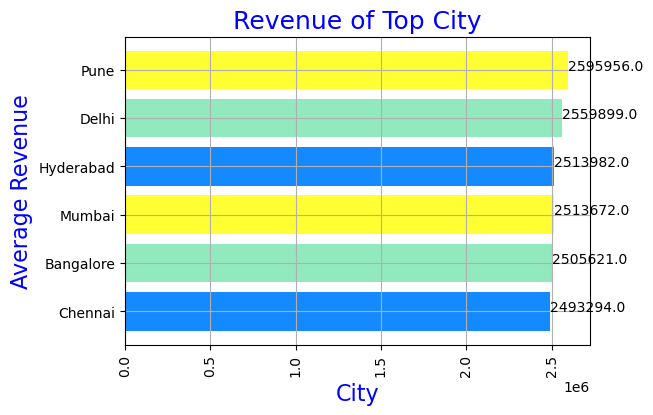

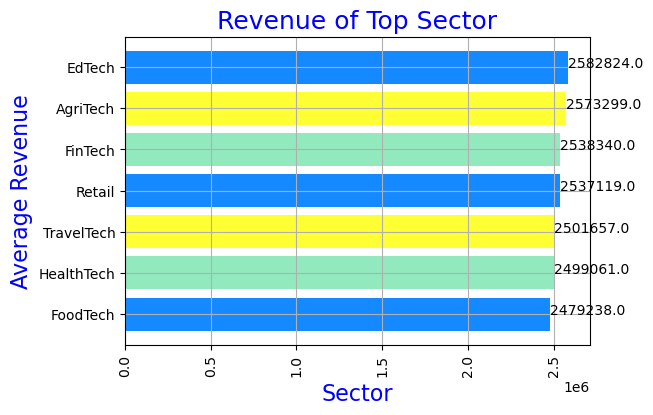

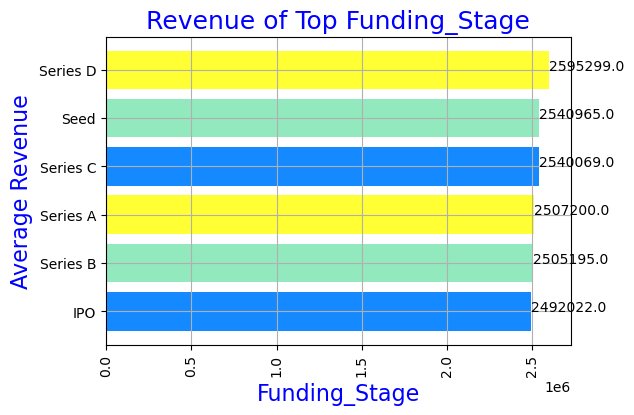

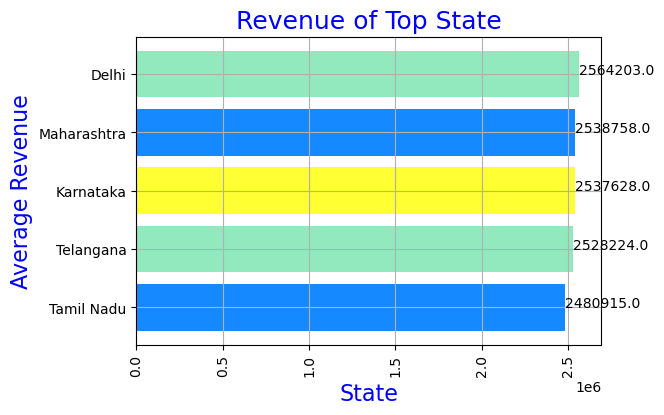

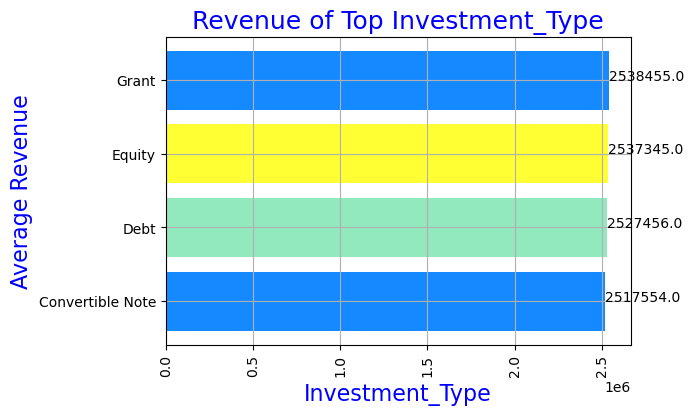

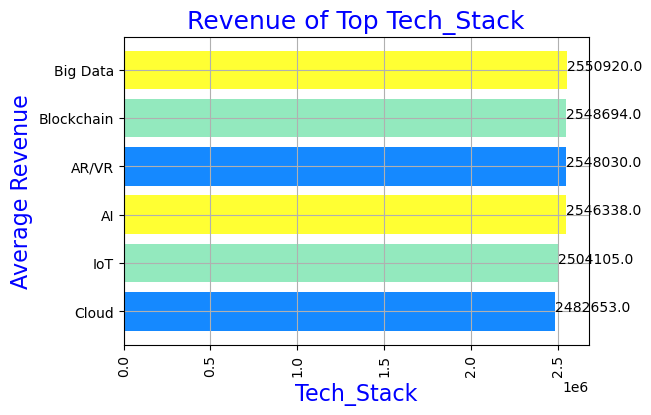

In [6]:
def SrtVis(siid,ctf,rvf):
    grpdt=siid.groupby(["{}".format(ctf)]).agg({"{}".format(rvf): [numpy.mean]}).sort_values(by=("{}".format(rvf),"mean"),ascending=False).iloc[:10]
    ftsii=grpdt.index.tolist()
    vlsii=numpy.round_(grpdt.values.flatten())
    vsdata=pandas.DataFrame({
        "{}".format(ctf):ftsii,
        "{}".format(rvf):vlsii
    })
    vsdata=vsdata.sort_values(by="{}".format(rvf),ascending=True)
    rvmp.figure(figsize=(6,4))
    rvmp.title("{} of Top {}".format(rvf,ctf),fontsize=18,color="b")
    rvmp.barh(vsdata["{}".format(ctf)],vsdata["{}".format(rvf)],color=["#1589FF","#93E9BE","#FFFF33"])
    rvmp.xticks(rotation=90)
    rvmp.xlabel("{}".format(ctf),fontsize=16,color="b")
    rvmp.ylabel("Average {}".format(rvf),fontsize=16,color="b")
    for vsdata_id, vsdata_val in enumerate(vsdata["{}".format(rvf)]):
        rvmp.text(vsdata_val, vsdata_id, str(vsdata_val))
    rvmp.grid()
    rvmp.show()
SrtVis(SIIData,"City","Revenue")
SrtVis(SIIData,"Sector","Revenue")
SrtVis(SIIData,"Funding_Stage","Revenue")
SrtVis(SIIData,"State","Revenue")
SrtVis(SIIData,"Investment_Type","Revenue")
SrtVis(SIIData,"Tech_Stack","Revenue")

## Feature Encoding

In [7]:
def EncodeAQI(sii):
    sii1=sii.copy()
    print("Feature Types Before Encoding")
    print(sii1.info())
    obsii=sii1.dtypes[sii1.dtypes=='object'].index.tolist()
    for l in obsii:
        sii1[l]=sii1[l].replace(sii1[l].unique(),[x for x in range(len(sii1[l].unique()))]) 
    print("Feature Types After Encoding")
    print(sii1.info())
    return sii1
EncodedSII=EncodeAQI(SIIData)
#AQEnc=utils.resample(AQEnc, replace = True, n_samples = int(len(AQEnc)*4), random_state = 0).reset_index(drop=True)
EncodedSII

Feature Types Before Encoding
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12428 entries, 0 to 12427
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Startup_ID              12428 non-null  object 
 1   Name                    12428 non-null  object 
 2   Sector                  12428 non-null  object 
 3   Sub-Sector              12428 non-null  object 
 4   City                    12428 non-null  object 
 5   State                   12428 non-null  object 
 6   Founded_Year            12428 non-null  int64  
 7   Founder_Name            12428 non-null  object 
 8   Funding_Stage           12428 non-null  object 
 9   Investment_Type         12428 non-null  object 
 10  Amount_Raised           12428 non-null  int64  
 11  Investors_Count         12428 non-null  int64  
 12  Lead_Investor           12428 non-null  object 
 13  Co-Investors            12428 non-null  object 
 14  Valuatio

,Startup_ID,Name,Sector,Sub-Sector,City,State,Founded_Year,Founder_Name,Funding_Stage,Investment_Type,...,Exit_Status,Acquisition_Details,Funding_Date,Pitch_Deck_Link,Social_Media_Followers,Competitors,Patents,ESG_Score,Diversity_Index,Net_Impact_Score
0,0,0,0,0,0,0,2022,0,0,0,...,0,0,0,0,27648,0,11,5.32,39.33,4.71
1,1,1,1,0,0,1,2019,1,1,1,...,1,1,1,1,89143,1,17,2.50,43.19,5.03
2,2,2,2,1,1,2,2010,2,2,0,...,1,0,2,2,62445,2,4,5.13,36.11,5.71
3,3,3,3,2,2,3,2007,3,1,2,...,1,0,3,3,30184,3,13,9.14,31.38,9.29
4,4,4,3,3,3,0,2019,4,3,0,...,0,0,4,4,56494,4,0,8.10,78.20,1.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12423,12423,12423,3,9,0,3,2016,997,0,1,...,0,0,1491,12423,10455,48,5,8.97,70.62,6.43
12424,12424,12424,1,0,2,2,2017,150,5,3,...,1,0,2778,12424,99554,88,7,1.66,71.28,2.64
12425,12425,12425,1,7,0,4,2014,241,2,3,...,0,0,2921,12425,44862,19,17,7.33,53.79,7.49
12426,12426,12426,3,4,0,4,2012,816,3,0,...,0,0,1634,12426,40025,48,20,8.34,32.86,8.05


## Outlier Detection and Removal

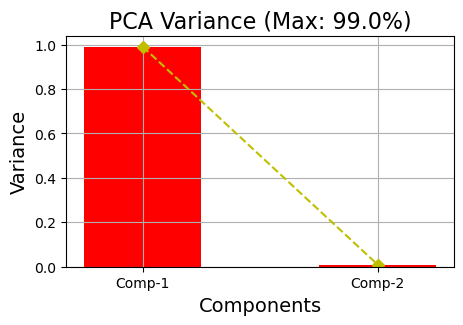

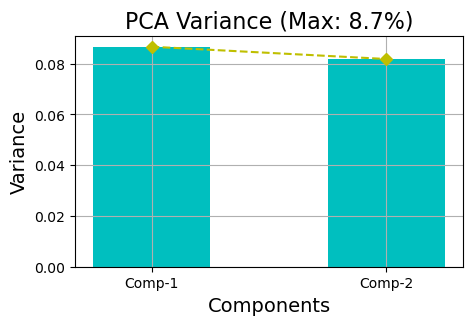

,Startup_ID,Name,Sector,Sub-Sector,City,State,Founded_Year,Founder_Name,Funding_Stage,Investment_Type,...,Acquisition_Details,Funding_Date,Pitch_Deck_Link,Social_Media_Followers,Competitors,Patents,ESG_Score,Diversity_Index,Net_Impact_Score,Revenue
0,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.956522,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.269213,0.000000,0.55,0.480000,0.322220,0.412222,1263794
1,0.000080,0.000080,0.166667,0.000000,0.0,0.25,0.826087,0.001001,0.2,0.333333,...,0.001096,0.000336,0.000080,0.890657,0.010101,0.85,0.166667,0.386564,0.447778,4324863
2,0.000161,0.000161,0.333333,0.111111,0.2,0.50,0.434783,0.002002,0.4,0.000000,...,0.000000,0.000672,0.000161,0.620858,0.020202,0.20,0.458889,0.268545,0.523333,2185306
3,0.000241,0.000241,0.500000,0.222222,0.4,0.75,0.304348,0.003003,0.2,0.666667,...,0.000000,0.001008,0.000241,0.294841,0.030303,0.65,0.904444,0.189698,0.921111,4709714
4,0.000322,0.000322,0.500000,0.333333,0.6,0.00,0.826087,0.004004,0.6,0.000000,...,0.000000,0.001345,0.000322,0.560720,0.040404,0.00,0.788889,0.970162,0.013333,1655812
5,0.000402,0.000402,0.666667,0.444444,0.2,0.50,0.956522,0.005005,0.4,0.000000,...,0.000000,0.001681,0.000402,0.474701,0.050505,0.95,0.541111,0.918986,0.816667,2630764
6,0.000483,0.000483,0.833333,0.555556,0.6,1.00,0.782609,0.006006,0.6,0.666667,...,0.002193,0.002017,0.000483,0.047011,0.060606,0.10,0.562222,0.691115,0.117778,425008
7,0.000563,0.000563,0.666667,0.222222,0.8,0.00,0.260870,0.007007,0.0,1.000000,...,0.000000,0.002353,0.000563,0.951018,0.070707,0.60,0.877778,0.911319,0.232222,393062
8,0.000644,0.000644,0.000000,0.000000,0.6,0.00,0.347826,0.008008,0.6,0.333333,...,0.003289,0.002689,0.000644,0.906250,0.080808,1.00,0.977778,0.412902,0.596667,343903
9,0.000724,0.000724,0.500000,0.666667,0.6,0.50,0.782609,0.009009,0.4,0.666667,...,0.000000,0.003025,0.000724,0.281158,0.090909,0.85,0.611111,0.039507,0.778889,4104649


In [8]:
def SIIOtRem(siid,v1):
    arrsiid=numpy.array(siid.iloc[:,:-1])
    pcsii = decomposition.PCA(n_components=2)
    pcsii.fit(arrsiid)
    pcvr=pcsii.explained_variance_ratio_
    max_var=max(pcvr.tolist())
    cmp_pcsii=["Comp-{}".format(i+1) for i in range(len(pcvr.tolist()))]
    lbl_x,lbl_y="Components","Variance"
    rvmp.figure(figsize=(5,3))
    max_var="%.3f" % max_var
    rvmp.title("PCA Variance (Max: {}%)".format(round(max(pcvr.tolist()),3)*100),fontsize=16)
    rvmp.bar(cmp_pcsii,pcvr.tolist(),width=0.5,color=v1)
    rvmp.plot(pcvr.tolist(),"--yD")
    rvmp.xlabel(lbl_x,fontsize=14)
    rvmp.ylabel(lbl_y,fontsize=14)
    rvmp.grid()
    rvmp.show()
    return pcvr
def SclngSII(siid):
    Nrmaq = preprocessing.MinMaxScaler()
    aq_normalized=Nrmaq.fit_transform(siid)
    return aq_normalized


VlsSIIVars=[]
VlsSIIVars.append(SIIOtRem(EncodedSII.drop(['Revenue'],axis=1),"r"))

flgoutlr=[]
for vr in VlsSIIVars:
    for v in vr:
        if v>0.8:
            flgoutlr.append(True)
if len(flgoutlr)==1 and True in flgoutlr:
    NormSII=SclngSII(EncodedSII.drop(['Revenue'],axis=1))
NormSII=pandas.DataFrame(NormSII,columns=EncodedSII.drop(['Revenue'],axis=1).columns.tolist())
NormSII['Revenue']=EncodedSII['Revenue'].tolist()
SIIOtRem(NormSII.drop('Revenue',axis=1),"c")
NormSII.head(10)

In [9]:
def FeatureSelection(siid):
    Xsiid=siid.drop('Revenue',axis=1)
    Ysiid=siid['Revenue']
    nmft=Xsiid.columns.tolist()
    rfr = ensemble.RandomForestRegressor(random_state=0)
    rfr.fit(Xsiid, Ysiid)
    rfrimp = rfr.feature_importances_
    rfrdata=pandas.DataFrame({"Feature":nmft,"Importance":rfrimp})
    rfrdata1=rfrdata[rfrdata['Importance']>rfrdata['Importance'].mean()]
    rvmp.figure(figsize=(7,3))
    rvmp.bar(rfrdata1['Feature'],rfrdata1['Importance'])
    rvmp.title("Feature Importance",fontsize=20,color="b")
    rvmp.xlabel("Features",fontsize=17,color="b")
    rvmp.ylabel("Importance",fontsize=17,color="b")
    rvmp.xticks(rotation=90)
    rvmp.grid()
    rvmp.show()
    display(HTML(rfrdata1.to_html()))
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    print("       Total Features Selected Using Ensemble: {}".format(len(rfrdata1)))
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    print("Selected Features Using Ensemble: ")
    print(*rfrdata1['Feature'].tolist(), sep="\n")
    return rfrdata1['Feature'].tolist()

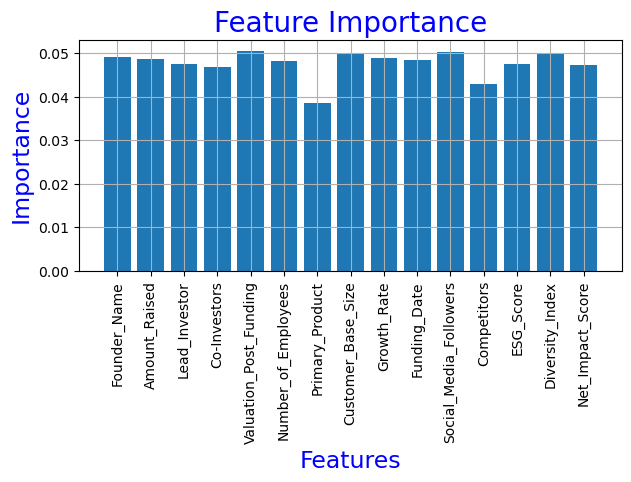

,Feature,Importance
7,Founder_Name,0.049090
10,Amount_Raised,0.048756
12,Lead_Investor,0.047494
13,Co-Investors,0.046879
14,Valuation_Post_Funding,0.050577
16,Number_of_Employees,0.048299
18,Primary_Product,0.038423
19,Customer_Base_Size,0.049986
20,Growth_Rate,0.048816
23,Funding_Date,0.048379


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
       Total Features Selected Using Ensemble: 15
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Selected Features Using Ensemble: 
Founder_Name
Amount_Raised
Lead_Investor
Co-Investors
Valuation_Post_Funding
Number_of_Employees
Primary_Product
Customer_Base_Size
Growth_Rate
Funding_Date
Social_Media_Followers
Competitors
ESG_Score
Diversity_Index
Net_Impact_Score


In [10]:
FetsCrrSII=FeatureSelection(NormSII) 

In [11]:
Predictor=NormSII[FetsCrrSII]
Predictor

,Founder_Name,Amount_Raised,Lead_Investor,Co-Investors,Valuation_Post_Funding,Number_of_Employees,Primary_Product,Customer_Base_Size,Growth_Rate,Funding_Date,Social_Media_Followers,Competitors,ESG_Score,Diversity_Index,Net_Impact_Score
0,0.000000,0.648913,0.000000,0.000000,0.241156,0.644898,0.000000,0.920962,0.103556,0.000000,0.269213,0.000000,0.480000,0.322220,0.412222
1,0.001001,0.571549,0.002004,0.002004,0.829879,0.838776,0.020408,0.823245,0.198444,0.000336,0.890657,0.010101,0.166667,0.386564,0.447778
2,0.002002,0.960873,0.004008,0.004008,0.860504,0.771429,0.040816,0.974007,0.248222,0.000672,0.620858,0.020202,0.458889,0.268545,0.523333
3,0.003003,0.808595,0.006012,0.006012,0.272346,0.318367,0.061224,0.413052,0.106444,0.001008,0.294841,0.030303,0.904444,0.189698,0.921111
4,0.004004,0.012484,0.008016,0.008016,0.543964,0.908163,0.081633,0.584413,0.909778,0.001345,0.560720,0.040404,0.788889,0.970162,0.013333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12423,0.997998,0.090409,0.573146,0.088176,0.541610,0.622449,0.061224,0.172775,0.482889,0.501176,0.095468,0.484848,0.885556,0.843807,0.603333
12424,0.150150,0.405933,0.607214,0.789579,0.621109,0.404082,1.000000,0.715951,0.404000,0.933782,0.995867,0.888889,0.073333,0.854809,0.182222
12425,0.241241,0.853326,0.204409,0.913828,0.659835,0.922449,0.122449,0.207465,0.686000,0.981849,0.443171,0.191919,0.703333,0.563261,0.721111
12426,0.816817,0.689953,0.727455,0.615230,0.018067,0.371429,0.122449,0.279958,0.190444,0.549244,0.394290,0.484848,0.815556,0.214369,0.783333


In [12]:
Target=NormSII['Revenue']
Target

0        1263794
1        4324863
2        2185306
3        4709714
4        1655812
          ...   
12423    4254976
12424    3183367
12425    4089205
12426    3879687
12427     996216
Name: Revenue, Length: 12428, dtype: int64

In [13]:
SiiRegMdls=[
    tree.DecisionTreeRegressor(),  
    neighbors.KNeighborsRegressor(),
    neural_network.MLPRegressor()
]
SiiRegNms=[
    "Decision Tree Regression",
    "KNeighbors Regression",
    "MLP Regression"
]

SiiRegTnds=SiiRegMdls.copy()
SAVFilesAll=os.listdir(os.getcwd())
bstestim=[]
TimeOptimize=[]
TuneScore=[]
Stored_SAV=['RegDT.sav','RegKNN.sav','RegNN.sav']
if 'RegDT.sav' in SAVFilesAll and 'RegKNN.sav' in SAVFilesAll and 'RegNN.sav' in SAVFilesAll:
    SiiReg1=pickle.load(open(Stored_SAV[0], 'rb'))
    SiiReg2=pickle.load(open(Stored_SAV[1], 'rb'))
    SiiReg3=pickle.load(open(Stored_SAV[2], 'rb'))
    SiiRegTnds=[SiiReg1,SiiReg2,SiiReg3]
    print(*SiiRegTnds, sep="\n")
else:
    OptPrms=[
        [{"criterion":['squared_error', 'absolute_error'],"max_depth":[20,30],"min_weight_fraction_leaf":[0.09,0.009]}],
        [{"weights":['uniform', 'distance'],"n_neighbors":[3,4,5],'algorithm':['auto', 'ball_tree', 'kd_tree']}],
        [{"activation":['logistic', 'tanh', 'relu'],"tol":[0.01,0.001,0.0001,0.00001],"alpha":[0.001,0.0001,0.00001]}],    
    ]

    for md in range(len(SiiRegTnds)):
        print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
        print("\tTuning {} Model\n".format(SiiRegNms[md]))
        t1 = datetime.datetime.now() 
        MdlCVSii = model_selection.GridSearchCV(SiiRegTnds[md], OptPrms[md], cv = 5, scoring='r2')
        MdlCVSii.fit(Predictor, Target)
        SiiRegTnds[md]=MdlCVSii.best_estimator_
        print("\tOptimum Parameters of {} => \n\t\t\t{}".format(SiiRegNms[md],MdlCVSii.best_estimator_))
        t2 = datetime.datetime.now()
        delta = t2 - t1
        eta=delta.total_seconds()
        print("\tTime of Tuning: {} Seconds".format(eta))
        print("\n\tFine Tuning Done for => '{}'".format(SiiRegNms[md]))
        print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
        bstestim.append(MdlCVSii.best_estimator_)
        TimeOptimize.append("%.2f" % eta)
        TuneScore.append(round(MdlCVSii.best_score_*100,2))

    for md1 in range(len(SiiRegTnds)):
        pickle.dump(SiiRegTnds[md1], open(Stored_SAV[md1], 'wb'))
    print(*SiiRegTnds, sep="\n")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
	Tuning Decision Tree Regression Model

	Optimum Parameters of Decision Tree Regression => 
			DecisionTreeRegressor(max_depth=20, min_weight_fraction_leaf=0.09)
	Time of Tuning: 232.45243 Seconds

	Fine Tuning Done for => 'Decision Tree Regression'
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
	Tuning KNeighbors Regression Model

	Optimum Parameters of KNeighbors Regression => 
			KNeighborsRegressor()
	Time of Tuning: 77.237997 Seconds

	Fine Tuning Done for => 'KNeighbors Regression'
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
	Tuning MLP Regression Model

	Optimum Parameters of MLP Regression => 
			MLPRegressor(alpha=0.001, tol=0.01)
	Time of Tuning: 1346.310902 Seconds

	Fine Tuning Done for => 'MLP 

In [14]:
if "SiiTuningRecord.csv" not in os.listdir():
    OptPrmData=pandas.DataFrame({"Models":SiiRegNms,"Opt_Parameters":bstestim,"TimeReq":TimeOptimize})
    OptPrmData.to_csv("SiiTuningRecord.csv")
else:
    OptPrmData=pandas.read_csv("SiiTuningRecord.csv")
    OptPrmData=OptPrmData.drop('Unnamed: 0',axis=1)
OptPrmData

,Models,Opt_Parameters,TimeReq
0,Decision Tree Regression,"DecisionTreeRegressor(max_depth=20, min_weight...",232.45
1,KNeighbors Regression,KNeighborsRegressor(),77.24
2,MLP Regression,"MLPRegressor(alpha=0.001, tol=0.01)",1346.31


In [15]:
def TrTsData(dtpr,dttr):
    siidt=pandas.concat([dtpr,dttr],axis=1)
    Train=utils.resample(siidt,replace = True, n_samples = int(len(siidt)*0.75), random_state = 10).reset_index(drop=True)
    Test=utils.resample(siidt,replace = True, n_samples = int(len(siidt)*0.25), random_state = 10).reset_index(drop=True)
    SIITrX,SIITsX,SIITrY,SIITsY=Train[FetsCrrSII],Test[FetsCrrSII],Train['Revenue'],Test['Revenue']
    return SIITrX,SIITsX,SIITrY,SIITsY

SIITrX,SIITsX,SIITrY,SIITsY=TrTsData(Predictor,Target)

In [16]:
len(SIITrX), len(SIITsX)

(9321, 3107)

In [17]:
def PredictSII(modelreg, XTrainData, XTestData, yTrainData, yTestData):
    SIIMdl=modelreg
    SIIMdl.fit(XTrainData, yTrainData)
    predsii=SIIMdl.predict(XTestData)
    predsii_tr=SIIMdl.predict(XTrainData)
    mse_sii=metrics.mean_squared_error(yTestData,predsii)
    r2_sii=round(metrics.r2_score(yTestData,predsii),4)*100
    r2_sii_train=round(metrics.r2_score(yTrainData,predsii_tr),4)*100
    mape_sii=metrics.mean_absolute_percentage_error(yTestData,predsii)
    evs_sii=metrics.explained_variance_score(yTestData,predsii)
    return r2_sii,r2_sii_train,mse_sii,mape_sii,evs_sii

MetricsSII=[[],[],[],[],[],[]]
for i in range(len(SiiRegMdls)):
    intim = datetime.datetime.now() 
    print("Predicting Using {}".format(SiiRegNms[i]))
    PrdCv=PredictSII(SiiRegMdls[i], SIITrX, SIITsX, SIITrY, SIITsY)
    MetricsSII[0].append(PrdCv[0])
    MetricsSII[1].append(PrdCv[1])
    MetricsSII[2].append(PrdCv[2])
    MetricsSII[3].append(PrdCv[3])
    MetricsSII[5].append(PrdCv[4])
    entim = datetime.datetime.now()
    ttim = entim-intim
    sectim=ttim.total_seconds()
    MetricsSII[4].append(round(sectim,3))
    print("Elasped Time: {} Seconds".format(round(sectim,3)))
    print("______________________________________")


Predicting Using Decision Tree Regression
Elasped Time: 0.699 Seconds
______________________________________
Predicting Using KNeighbors Regression
Elasped Time: 4.367 Seconds
______________________________________
Predicting Using MLP Regression
Elasped Time: 5.824 Seconds
______________________________________


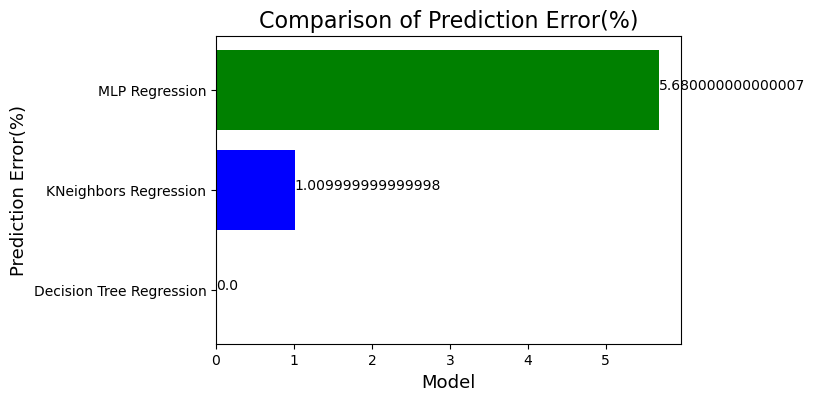

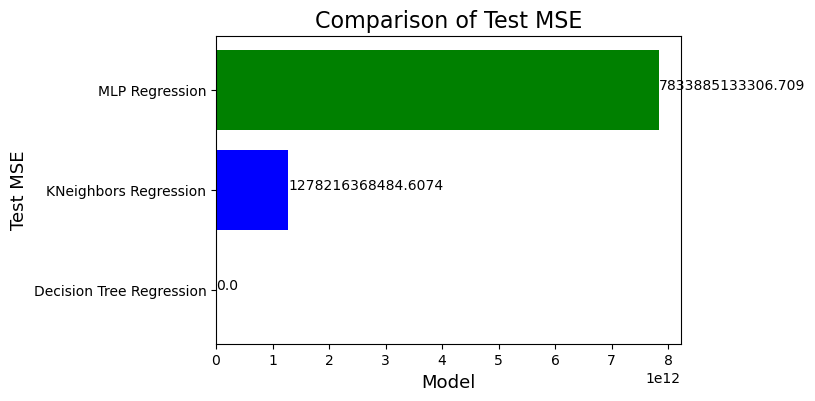

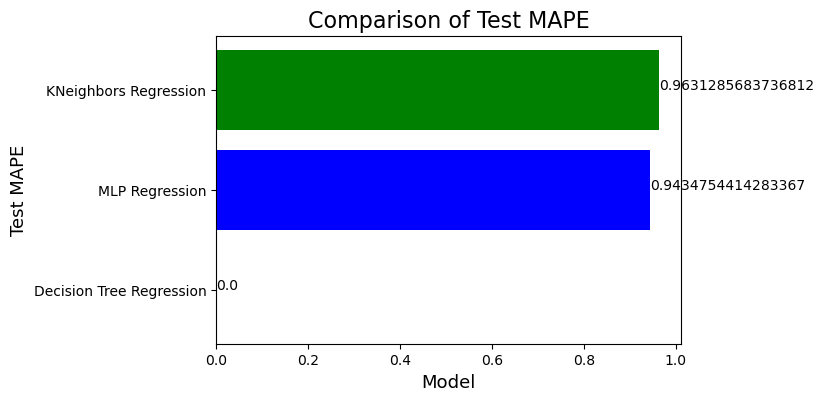

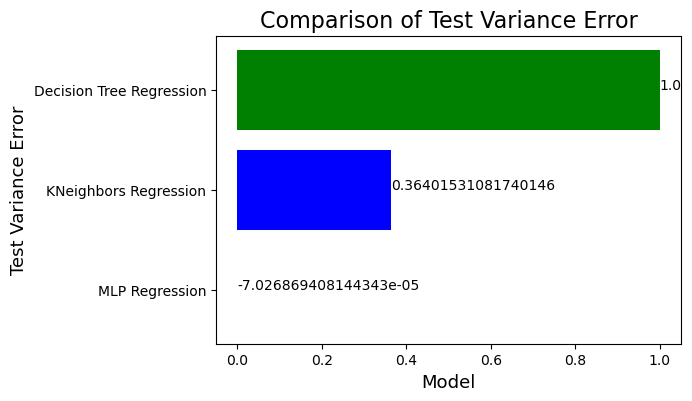

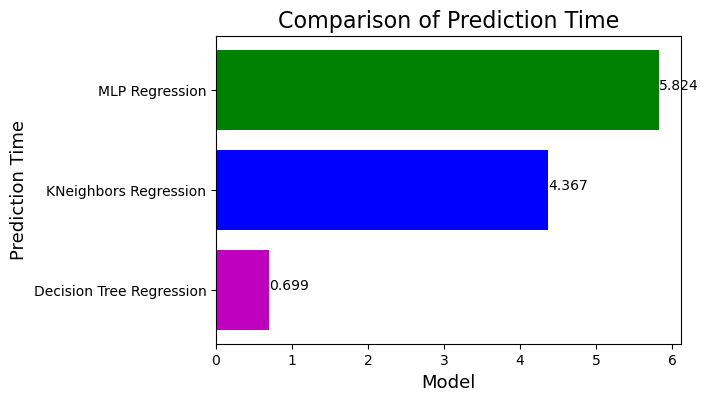

,Model,R2 Score,Prediction Error(%),Test MSE,Test MAPE,Test Variance Error,Prediction Time
0,Decision Tree Regression,100.00,0.00,0.000000e+00,0.000000,1.000000,0.699
1,MLP Regression,-289.94,5.68,7.833885e+12,0.943475,-0.000070,5.824
2,KNeighbors Regression,36.38,1.01,1.278216e+12,0.963129,0.364015,4.367


In [18]:
DFSiiMet=pandas.DataFrame({
    "Model":SiiRegNms,
    "R2 Score":MetricsSII[0],
    "Prediction Error(%)":abs(numpy.array(MetricsSII[1])-numpy.array(MetricsSII[0])),
    "Test MSE":MetricsSII[2],
    "Test MAPE":MetricsSII[3],
    "Test Variance Error":MetricsSII[5],
    "Prediction Time":MetricsSII[4]
})


met_fets=DFSiiMet.columns.tolist()[2:]
for i in met_fets:
    DFSiiMet=DFSiiMet.sort_values(by=i,ascending=True)
    rvmp.figure(figsize=(6,4))
    rvmp.title("Comparison of {}".format(i),fontsize=16)
    rvmp.barh(DFSiiMet['Model'],DFSiiMet[i],color=["m","b","g","c"])
    rvmp.xlabel("Model",fontsize=13)
    rvmp.ylabel("{}".format(i),fontsize=13)
    for gid, vlgl in enumerate(DFSiiMet[i]):
        rvmp.text(vlgl, gid, str(vlgl))
    rvmp.show()
DFSiiMet=DFSiiMet.sort_values(by="Test MAPE",ascending=True).reset_index(drop=True)
DFSiiMet.to_csv("Result_SII.csv")
DFSiiMet

In [19]:
SiiRegTnds[0]

DecisionTreeRegressor(max_depth=20, min_weight_fraction_leaf=0.09)

In [20]:
for x in range(5):
    pidx=numpy.random.randint(len(Predictor))
    uinp=[Predictor.iloc[pidx]]
    avgrev=Target.mean()
    revpred=SiiRegTnds[0].predict(uinp)[0]
    strtup=SIIData.iloc[pidx,1]
    sctr=SIIData.iloc[pidx,2]
    if revpred>avgrev:
        print("The investment in {} Sector ({}) is Profitable with Present Revenue {}".format(sctr,strtup,revpred))
    else:
        print("The investment in {} Sector ({}) is Not Profitable with Present Revenue {}".format(sctr,strtup,revpred))

The investment in TravelTech Sector (Startup_1806) is Profitable with Present Revenue 2608817.1941260747
The investment in TravelTech Sector (Startup_11943) is Profitable with Present Revenue 2619679.696699843
The investment in FinTech Sector (Startup_5019) is Not Profitable with Present Revenue 2452715.4692107546
The investment in HealthTech Sector (Startup_9383) is Profitable with Present Revenue 2619679.696699843
The investment in Retail Sector (Startup_12085) is Not Profitable with Present Revenue 2486803.0177619895


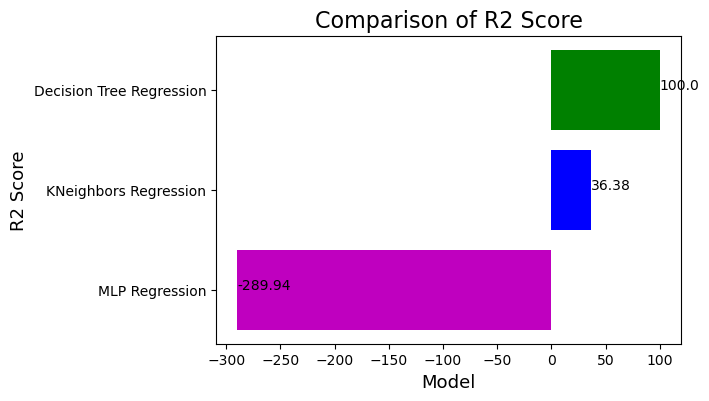

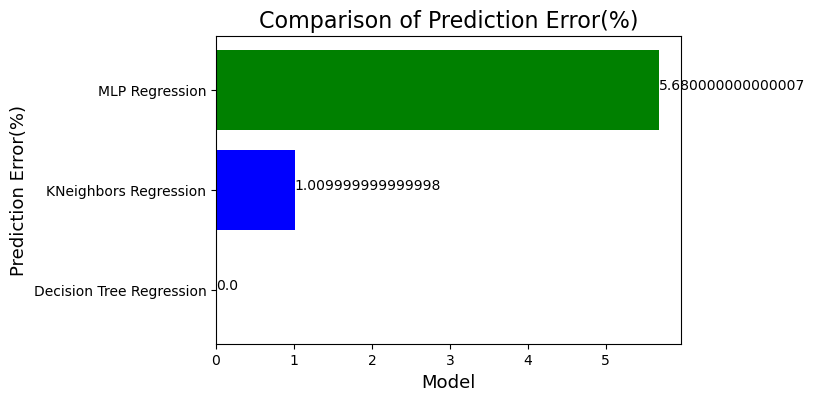

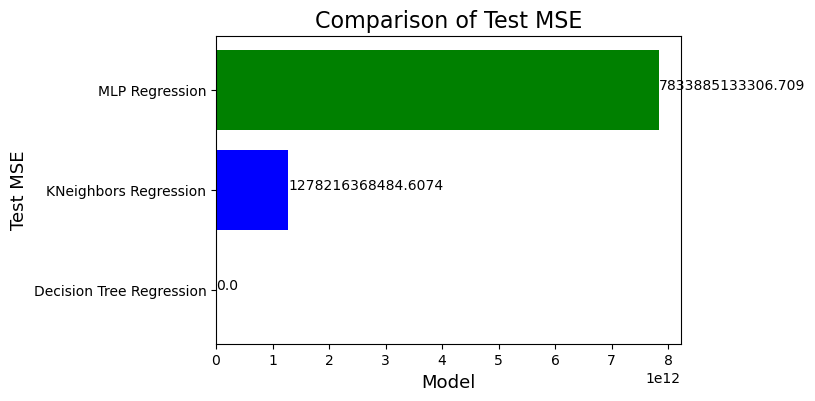

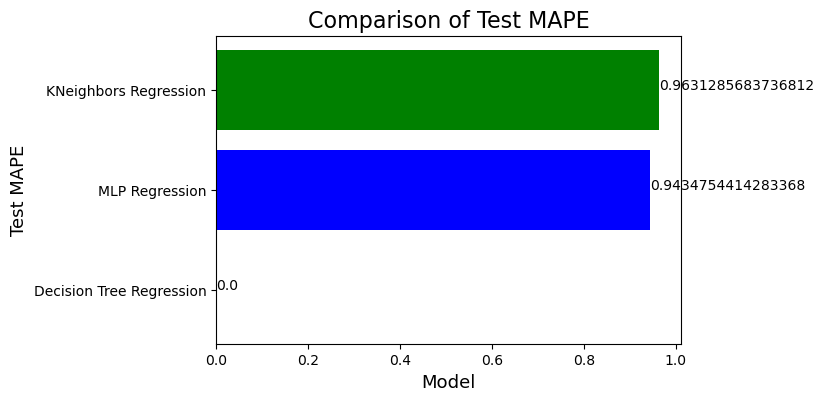

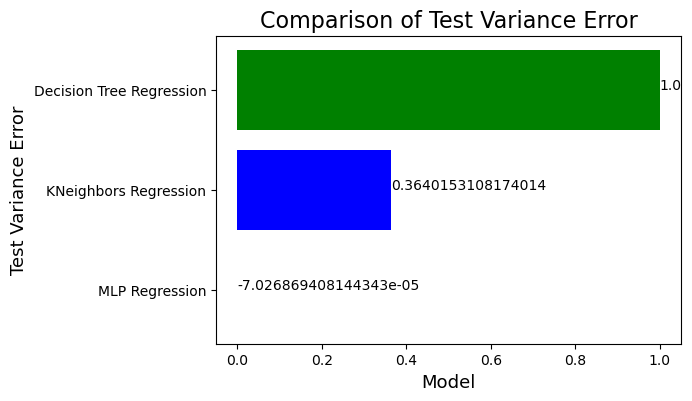

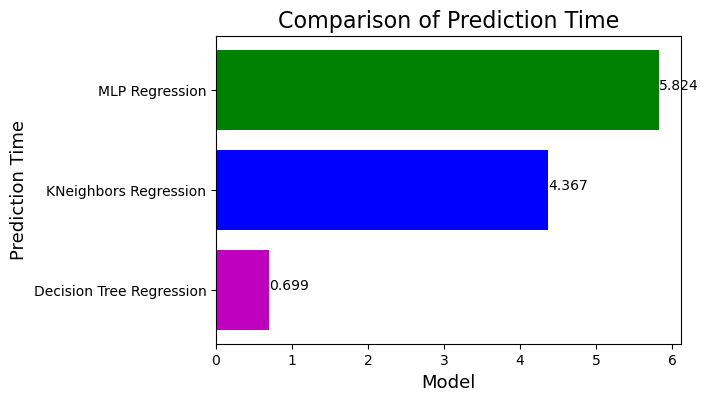

,Unnamed: 0,Model,R2 Score,Prediction Error(%),Test MSE,Test MAPE,Test Variance Error,Prediction Time
0,0,Decision Tree Regression,100.00,0.00,0.000000e+00,0.000000,1.000000,0.699
1,1,MLP Regression,-289.94,5.68,7.833885e+12,0.943475,-0.000070,5.824
2,2,KNeighbors Regression,36.38,1.01,1.278216e+12,0.963129,0.364015,4.367


In [22]:
DFSiiMet=pandas.read_csv("Result_SII.csv")
met_fets=DFSiiMet.columns.tolist()[2:]
for i in met_fets:
    DFSiiMet=DFSiiMet.sort_values(by=i,ascending=True)
    rvmp.figure(figsize=(6,4))
    rvmp.title("Comparison of {}".format(i),fontsize=16)
    rvmp.barh(DFSiiMet['Model'],DFSiiMet[i],color=["m","b","g","c"])
    rvmp.xlabel("Model",fontsize=13)
    rvmp.ylabel("{}".format(i),fontsize=13)
    for gid, vlgl in enumerate(DFSiiMet[i]):
        rvmp.text(vlgl, gid, str(vlgl))
    rvmp.show()
DFSiiMet=DFSiiMet.sort_values(by="Test MAPE",ascending=True).reset_index(drop=True)
DFSiiMet.to_csv("Result_SII.csv")
DFSiiMet